In [88]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("dark_background")

# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [35]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b - a) * x
print(randoms)

[2.45708475 2.9743307  2.69875449 2.35853839 2.88359057 2.02836372
 2.69701558 2.73464042 2.26899322 2.40641262]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

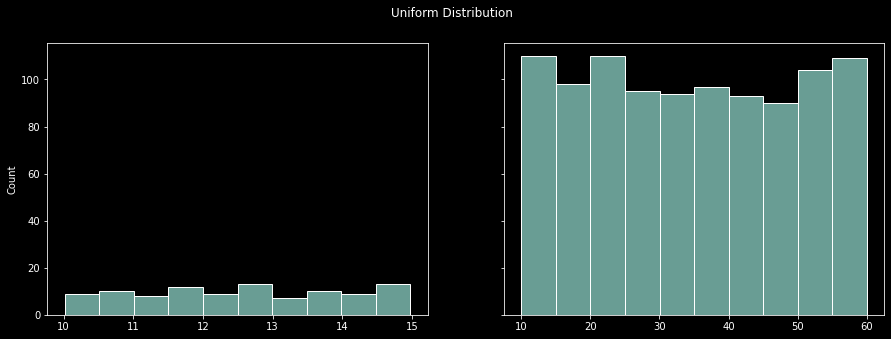

In [71]:
#option using code provided
def uniform_dist(bottom, ceiling, count):
    """
    Generate a list of n random numbers between bottom and ceiling
    """
    x = uniform.rvs(size=count)
    randoms  = bottom + (ceiling - bottom) * x
    return randoms

#simplified option using scipy only
def uniform_dist_simplified(bottom, ceiling, count):
    """
    Generate a list of n random numbers between bottom and ceiling
    """
    return uniform.rvs(size=count, loc=bottom, scale=ceiling-bottom)

uniform_10_15_100 = uniform_dist(10, 15, 100)
uniform_10_60_1000 = uniform_dist(10, 60, 1000)

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Uniform Distribution')
fig1 = sns.histplot(uniform_10_15_100, bins = 10, ax = axs[0])
fig2 = sns.histplot(uniform_10_60_1000, bins = 10, ax = axs[1])

How are the two distributions different?

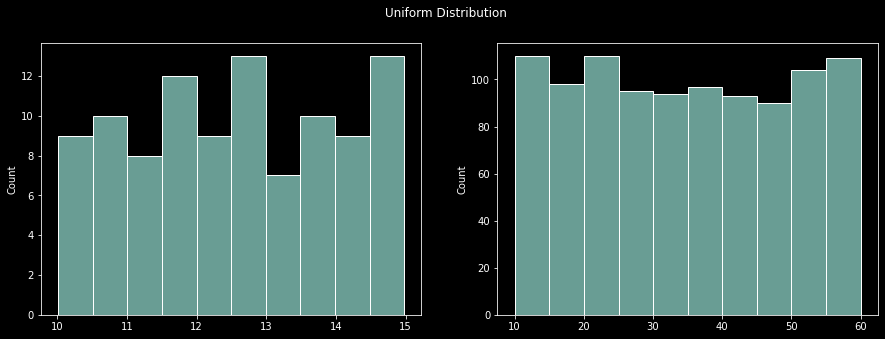

In [72]:
#answer: the second image is more uniform than the first one because the count of trials is much larger, find below same distributions but not sharing y axis to see the difference
#note: in the first image, the higher numbers count is lower than the rest, not showing the expected distribution (parallelepiped)
fig, axs = plt.subplots(1, 2, sharey=False, figsize=(15, 5))
fig.suptitle('Uniform Distribution')
fig1 = sns.histplot(uniform_10_15_100, bins = 10, ax = axs[0])
fig2 = sns.histplot(uniform_10_60_1000, bins = 10, ax = axs[1])

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

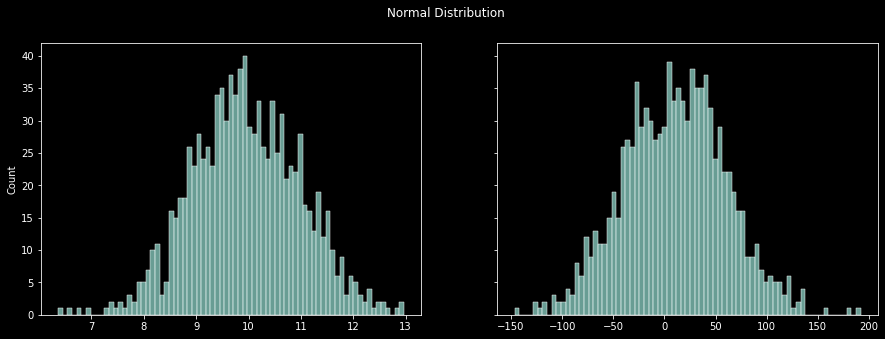

In [85]:
def normal_dist(avg, std, count):
    """
    Generate a list of n random numbers between bottom and ceiling
    """
    normal = norm(loc=avg, scale=std)
    return normal.rvs(count)

normal_10_1_1000 = normal_dist(10, 1, 1000)
normal_10_50_1000 = normal_dist(10, 50, 1000)

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
fig.suptitle('Normal Distribution')
fig1 = sns.histplot(normal_10_1_1000, bins = 75, ax = axs[0])
fig2 = sns.histplot(normal_10_50_1000, bins = 75, ax = axs[1])

How are the two distributions different?

In [87]:
#the only difference between these two is the standard deviation, the first is 10% of the average and the second is 500% of the average in which the data is much more dispersed

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.

Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [102]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.sample(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
13607,Ford,Mustang,2003,4.6,8.0,Manual 5-spd,Rear-Wheel Drive,Subcompact Cars,Regular,17.347895,16,23,19,467.736842,1750
2473,BMW,740il/740il Protection,2000,4.4,8.0,Automatic 5-spd,Rear-Wheel Drive,Large Cars,Premium,18.311667,15,22,18,493.722222,2250
23072,Mazda,Navajo 4x4,1994,4.0,6.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Special Purpose Vehicles,Regular,19.388824,15,20,17,522.764706,1950
33684,Toyota,Tacoma 4WD,2002,3.4,6.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks 4WD,Regular,20.600625,15,17,16,555.437500,2100
3958,Cadillac,Cimarron,1985,2.0,4.0,Automatic 3-spd,Front-Wheel Drive,Compact Cars,Regular,13.733750,22,27,24,370.291667,1400


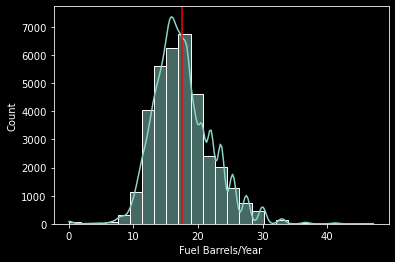

In [115]:
sns.histplot(vehicles['Fuel Barrels/Year'], bins=25, kde = True)
avg = vehicles["Fuel Barrels/Year"].mean()
plt.axvline(x=avg, color='red');

2. CO2 Emission Grams/Mile 

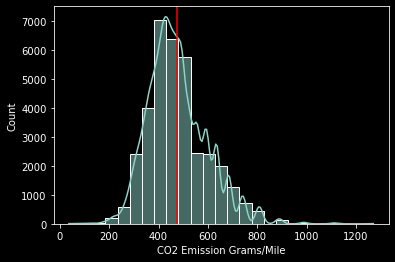

In [116]:
sns.histplot(vehicles['CO2 Emission Grams/Mile'], bins=25, kde = True)
avg = vehicles["CO2 Emission Grams/Mile"].mean()
plt.axvline(x=avg, color='red');

3. Combined MPG

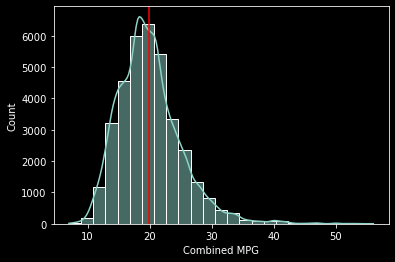

In [118]:
sns.histplot(vehicles['Combined MPG'], bins=25, kde = True)
avg = vehicles["Combined MPG"].mean()
plt.axvline(x=avg, color='red');

Which one(s) of the variables are nearly normally distributed? How do you know?

In [119]:
#Fuel Barrels/Year: normal distribution
#CO2 Emission Grams/Mile: normal distribution
#Combined MPG (miles per gallon - city/highway): normal distribution

#i consider all of them normal distributions with some outliers

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

## NOTE: I'VE MODIFIED SPECIFICATIONS OF THE TASK IN ORDER TO SHOW EXPONENTIAL DISTRIBUTION BETTER
Changes:

1 - Use the function to generate two number sequences with the size of 100 and 1000.

2 - Plot the distributions as histograms with the nubmer of bins as 50.


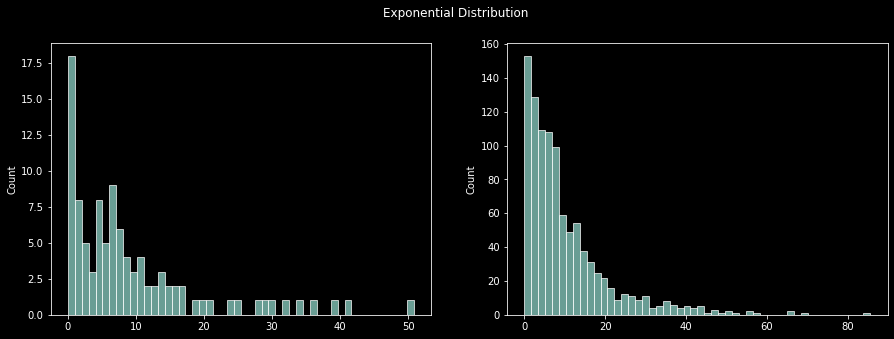

In [158]:
def exp_dist(size):
    return np.random.exponential(10, size=size)

exp_10_100 = exp_dist(100)
exp_10_1000 = exp_dist(1000)

fig, axs = plt.subplots(1, 2, sharey=False, figsize=(15, 5),)
fig.suptitle('Exponential Distribution')
fig1 = sns.histplot(exp_10_100, bins = 50, ax = axs[0])
fig2 = sns.histplot(exp_10_1000, bins = 50, ax = axs[1])

How are the two distributions different?

In [157]:
#the greater is the size, the better it is shown in the plot the exponencial distribution

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [162]:
exp_10 = expon(scale=10)

exp_10.cdf(15)

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [163]:
1 - exp_10.cdf(15)

0.2231301601484298